In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('survey_results.csv',sep=',')

In [3]:
a = df.to_numpy()

In [4]:
a = a.T

In [5]:
a[a=='Real'] = 1
a[a=='Generated'] = 0

In [115]:
pd.DataFrame(a)

,0,1,2,3,4,5,6,7,8,9
0,"'I kill cause I'm hungry'...Dude, eat a Snicke...",0,1,0,1,1,0,0,0,0
1,Y people are hungry in this world people child...,0,0,1,0,1,0,1,1,0
2,IMITTTT DING AT HIM COME THIS COWER AS GONNA B...,0,0,0,0,0,0,1,0,0
3,If you think the screaming ( ) &nbsp; ( ) &nbs...,0,0,0,1,0,0,1,0,0
4,"hella cocky, https://soundcloud.com/private-as...",1,1,1,0,1,0,1,0,1
5,Why they thought showing an unfinished Gerald ...,1,1,1,1,1,1,1,1,1
6,I love the image of Cavill as Superman - it lo...,1,1,1,0,0,0,1,1,1
7,It suggesting crop to a closet hahahaha,0,0,0,0,0,0,1,0,0
8,I would tell me share it with all in hollywood...,0,0,0,1,0,0,1,0,0
9,"voice, maybe its use for my skincare... I use ...",0,0,0,0,1,0,1,0,0


In [57]:
def evalAccuracy(a,removed):
    pospred = np.sum(a[:,1:],axis=1)
    negpred = 9-pospred
    # if index % 5 == 0, then its real (use pp)
    correct = []
    for i,comment in enumerate(a[:,0]):
        if i%5 ==0:
            correct.append(pospred[i])
        else:
            correct.append(negpred[i])
    #print(type(correct))
    correct = np.array(correct)
    print(correct)
    incorrect = 9-correct
    print(incorrect)
    # split into categories
    correct_cat = [0,0,0,0,0]
    for i in range(len(correct)):
        ind = i%5
        correct_cat[ind] += correct[i]
    
    
    incorrect_cat = [0,0,0,0,0]
    for i in range(len(incorrect)):
        ind = i%5
        incorrect_cat[ind] += incorrect[i]
        
    #hard coded modification
    for i in removed:
        correct_cat[i%5] -= 9
    print(correct_cat)
    print(incorrect_cat)
    s = np.add(correct_cat, incorrect_cat)
    #
    print(s)
    accuracy = np.array(correct_cat)/s
    return accuracy

In [41]:
accuracyA = evalAccuracy(a)

[3 5 8 7 3 9 3 8 7 7 9 8 6 5 5 8 5 7 3 7 9 6 9 8 8 7 3 9 7 3 9 5 9 3 8 8 3
 7 5 5 5 4 1 7 1 9 1 7 7 3 5 2 8 5 2 8 1 1 7 7 4 0 6 7 6 7 5 7 4 3 8 2 6 4
 3 7 6 7 7 5]
[6 4 1 2 6 0 6 1 2 2 0 1 3 4 4 1 4 2 6 2 0 3 0 1 1 2 6 0 2 6 0 4 0 6 1 1 6
 2 4 4 4 5 8 2 8 0 8 2 2 6 4 7 1 4 7 1 8 8 2 2 5 9 3 2 3 2 4 2 5 6 1 7 3 5
 6 2 3 2 2 4]
[115, 59, 106, 93, 76]
[29, 85, 38, 51, 68]
[144 144 144 144 144]


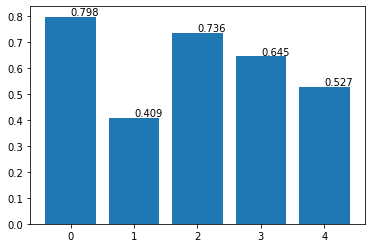

In [129]:
plt.bar(list(range(accuracyA.shape[0])),accuracyA)
for index, value in enumerate(accuracyA):
    plt.text(index,value+.005, str(value)[:5])
plt.show()

In [71]:
b = np.copy(a)
b[[1,11,51],1:] = 0

accuracyB = evalAccuracy(b,[1,11,51])

[3 9 8 7 3 9 3 8 7 7 9 9 6 5 5 8 5 7 3 7 9 6 9 8 8 7 3 9 7 3 9 5 9 3 8 8 3
 7 5 5 5 4 1 7 1 9 1 7 7 3 5 9 8 5 2 8 1 1 7 7 4 0 6 7 6 7 5 7 4 3 8 2 6 4
 3 7 6 7 7 5]
[6 0 1 2 6 0 6 1 2 2 0 0 3 4 4 1 4 2 6 2 0 3 0 1 1 2 6 0 2 6 0 4 0 6 1 1 6
 2 4 4 4 5 8 2 8 0 8 2 2 6 4 0 1 4 7 1 8 8 2 2 5 9 3 2 3 2 4 2 5 6 1 7 3 5
 6 2 3 2 2 4]
[115, 44, 106, 93, 76]
[29, 73, 38, 51, 68]
[144 117 144 144 144]


In [144]:
print(accuracyA,accuracyB)

[0.79861111 0.40972222 0.73611111 0.64583333 0.52777778] [0.79861111 0.37606838 0.73611111 0.64583333 0.52777778]


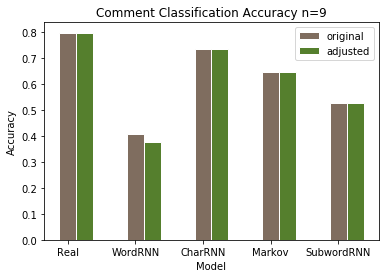

In [140]:
# set width of bar
barWidth = 0.25
 

r1 = np.arange(len(accuracyA))
r2 = [x + barWidth for x in r1]


plt.bar(r1, accuracyA, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, accuracyB, color='#557f2d', width=barWidth, edgecolor='white', label='var2')

 
# Add xticks on the middle of the group bars
plt.xlabel('Model')
plt.xticks(r1, ['Real', 'WordRNN', 'CharRNN', 'Markov', 'SubwordRNN'])
plt.ylabel('Accuracy')

# Create legend & Show graphic
plt.legend(labels=['original','adjusted'])
plt.title('Comment Classification Accuracy n=9')
plt.show()


In [95]:
pos_preds = np.sum(a[:,1:],axis=1)

In [96]:
pos_preds

array([3, 4, 1, 2, 6, 9, 6, 1, 2, 2, 9, 1, 3, 4, 4, 8, 4, 2, 6, 2, 9, 3,
       0, 1, 1, 7, 6, 0, 2, 6, 9, 4, 0, 6, 1, 8, 6, 2, 4, 4, 5, 5, 8, 2,
       8, 9, 8, 2, 2, 6, 5, 7, 1, 4, 7, 8, 8, 8, 2, 2, 4, 9, 3, 2, 3, 7,
       4, 2, 5, 6, 8, 7, 3, 5, 6, 7, 3, 2, 2, 4], dtype=object)

In [82]:
a_len = len(a[0:20,1:].flatten())

In [98]:
neg_preds = 9-pos_preds

In [101]:
correct = [0,0,0,0]
for r in range(a.shape[0]):
    i = r // 20
    if r % 5 == 0:
        correct[i] += pos_preds[r]
    else:
        correct[i] += neg_preds[r]
        

In [105]:
accuracyC = np.array(correct) / 180

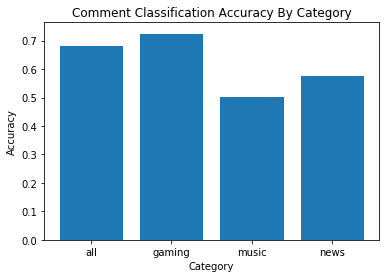

In [143]:
bars1 = [12, 30, 1, 8]
plt.bar([0,1,2,3], accuracyC,  edgecolor='white', label='var1')
 
# Add xticks on the middle of the group bars
plt.xlabel('Category')
plt.xticks([0,1,2,3], ['all', 'gaming', 'music', 'news'])
plt.ylabel('Accuracy')
plt.title('Comment Classification Accuracy By Category')
plt.show()
